In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Customer churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print("Dataset Shape:", data.shape)
print("Dataset Info:")
print(data.info())


Dataset Shape: (99, 15)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        99 non-null     object 
 1   gender            99 non-null     object 
 2   SeniorCitizen     99 non-null     int64  
 3   Partner           99 non-null     object 
 4   Dependents        99 non-null     object 
 5   tenure            99 non-null     int64  
 6   PhoneService      99 non-null     object 
 7   MultipleLines     99 non-null     object 
 8   InternetService   99 non-null     object 
 9   Contract          99 non-null     object 
 10  PaperlessBilling  99 non-null     object 
 11  PaymentMethod     99 non-null     object 
 12  MonthlyCharges    99 non-null     float64
 13  TotalCharges      99 non-null     float64
 14  Churn             99 non-null     object 
dtypes: float64(2), int64(2), object(11)
memory usage: 11.7+

In [4]:
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [5]:
data = data.dropna()

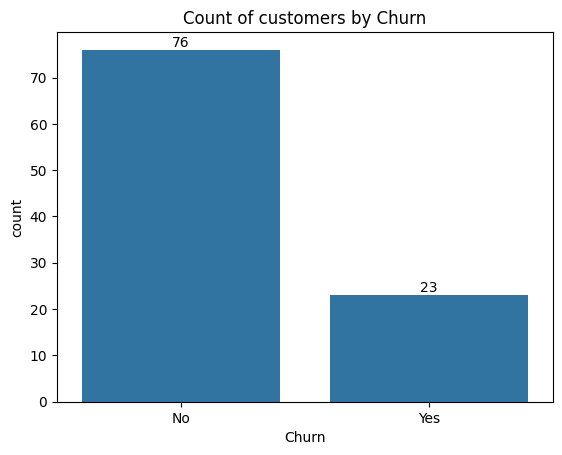

In [5]:
ax = sns.countplot(x = 'Churn', data = data)

ax.bar_label(ax.containers[0])
plt.title("Count of customers by Churn")
plt.show()

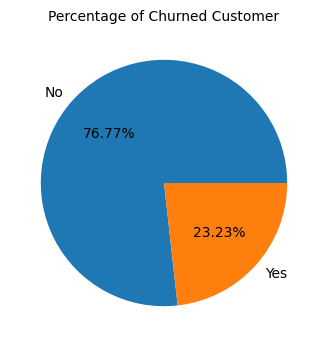

In [7]:
plt.figure(figsize = (4,4))
gb = data.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customer", fontsize = 10)
plt.show()

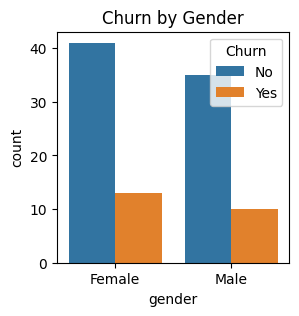

In [9]:
plt.figure(figsize = (3,3))
sns.countplot(x ="gender", data = data, hue = "Churn")
plt.title("Churn by Gender")
plt.show()

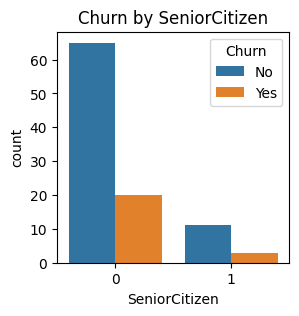

In [11]:
plt.figure(figsize = (3,3))
sns.countplot(x = "SeniorCitizen", data = data, hue = "Churn")
plt.title("Churn by SeniorCitizen")
plt.show()

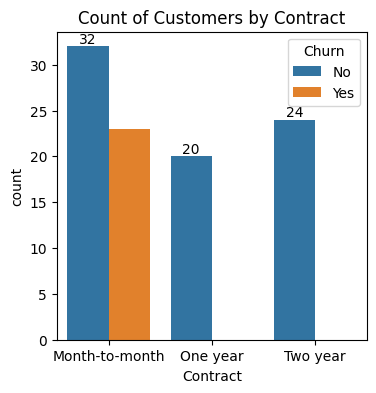

In [12]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data = data, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

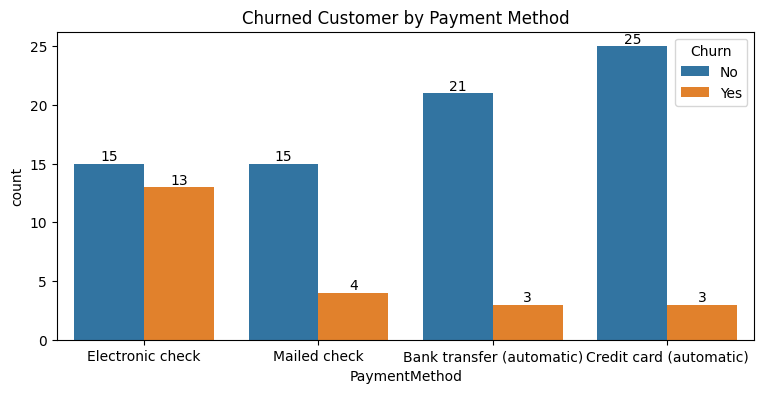

In [14]:
plt.figure(figsize = (9,4))
ax = sns.countplot(x = "PaymentMethod", data = data, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customer by Payment Method")
plt.show()

In [6]:
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


In [7]:
X = data.drop('Churn', axis=1)  # Replace 'Churn' with the actual target column name
y = data['Churn']

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("\nKNN Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


KNN Results:
Accuracy: 0.75
Confusion Matrix:
[[12  0]
 [ 5  3]]


In [11]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Results:
Accuracy: 0.65
Confusion Matrix:
[[10  2]
 [ 5  3]]


In [12]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

# Decision Tree


Logistic Regression Results:
Accuracy: 0.6
Confusion Matrix:
[[9 3]
 [5 3]]


In [13]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("\nDecision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))


Decision Tree Results:
Accuracy: 0.5
Confusion Matrix:
[[7 5]
 [5 3]]


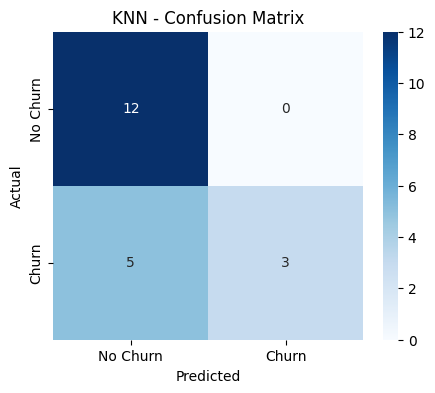

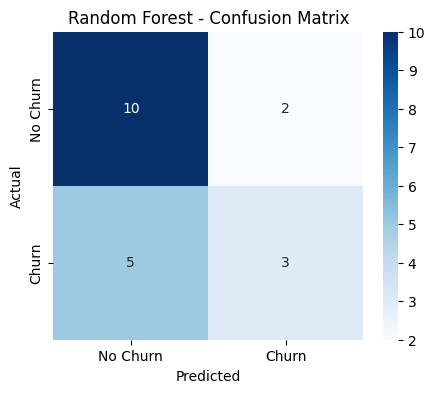

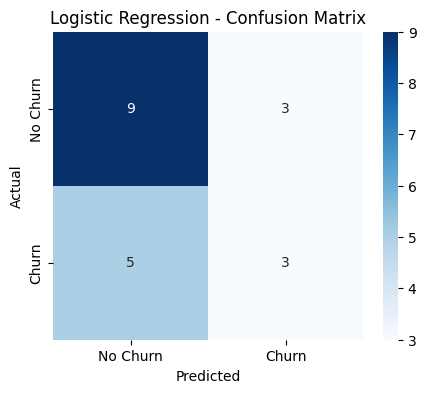

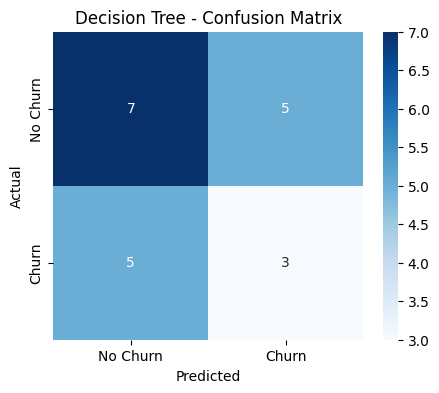

In [14]:
models = {'KNN': y_pred_knn, 'Random Forest': y_pred_rf, 'Logistic Regression': y_pred_lr, 'Decision Tree': y_pred_dt}
for model_name, y_pred in models.items():
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
